# Predicting Thyroid Cancer Recurrence with Machine Learning

## Objective
By preprocessing the thyroid cancer risk factor data to create a Random Forest model that can predict whether a patient will have thyroid cancer recurrence.

# Introduction

Cancer can return even after successful treatment, making regular follow-up appointments crucial for early detection of recurrence. Early intervention can significantly improve outcomes if the cancer returns. This is particularly important for thyroid cancer, a type of cancer that originates in the thyroid gland, a small butterfly-shaped organ located at the base of the neck. The thyroid plays a vital role in regulating the body’s metabolism, heart rate, and temperature by producing essential hormones.

Thyroid cancer can develop in various forms, each with different levels of aggressiveness and prognosis. Several factors can increase the risk of recurrence, such as the patient’s age at the time of diagnosis, the initial stage of the cancer, the specific type of thyroid cancer, and much mor

**In this project, the task is to preprocess, or prepare the data for use in our Random Forest and othrs Models. Then, determining the top three factors indicating thyroid cancer recurrence.** 

## Dataset
This dataset contains data about thyroid checkups for people with a diagnosis and is a
comprehensive collection of patient information, specifically focused on individuals diagnosed
with cancer.

### Description of columns:
The dataset contains **17 columns** and **383 rows**.

Attribute Information:
- **Age:** The age at the time of diagnosis or treatment.
- **Gender:** The gender of the patient (male or female).
- **Smoking:** Whether the patient is a smoker or not.
- **Hx Smoking:** Smoking history of the patient (e.g., whether they have ever smoked).
- **Hx Radiotherapy:** History of radiotherapy treatment for any condition.
- **Thyroid Function:** The status of thyroid function, possibly indicating if there are any
abnormalities.
- **Physical Examination:** Findings from a physical examination of the patient.
- **Adenopathy:** Presence or absence of enlarged lymph nodes (adenopathy) in the neck
region.
- **Pathology:** Specific type of thyroid cancer determined by the pathological examination of
biopsy samples.
- **Focality:** Whether the cancer is unifocal (limited to one location) or multifocal (present in
multiple locations).

- **Risk:** The risk category of the cancer based on various factors, such as tumor size,
extent of spread, and histological type.
- **T:** Tumor classification based on its size and extent of invasion into nearby structures.
- **N:** Nodal classification indicating the involvement of lymph nodes.
- **M:** Metastasis classification indicating the presence or absence of distant metastases.
- **Stage:** The overall stage of the cancer, typically determined by combining T, N, and M
classifications.
- **Response:** Response to treatment, indicating whether the cancer responded positively,
negatively, or remained stable after treatment.
- **Recurred:** Has the cancer recurred after initial treatment.

- Class distribution: 275 NO, 108 YES

The target column for our project is **Recurred**. We have to build a model which can predict if the cancer is **(Recurred - yes(1))** or **(Recurred- no(0))**.after initial treatment

## Importing Libraries

In [239]:
# Data manipulation and numerical operations
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations

# Data visualization libraries
import matplotlib.pyplot as plt   # For plotting and visualizations
import seaborn as sns   # For visualizations

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split   # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
from sklearn.metrics import roc_curve, roc_auc_score  # For calculating ROC curve and AUC
from sklearn.model_selection import cross_val_score   # For evaluating model performance
from sklearn.model_selection import learning_curve

# Scikit-learn: Preprocessing
from sklearn.preprocessing import LabelEncoder   # For encoding categorical labels into numeric values
from sklearn.preprocessing import OneHotEncoder  # For encoding categorical features using one-hot encoding
from sklearn.preprocessing import MinMaxScaler      # For rescaling the data
from sklearn.preprocessing import StandardScaler

# Scikit-learn: Machine learning model
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV 

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz  # For exporting decision trees in DOT format
from sklearn.tree import plot_tree  # For plotting decision trees

In [47]:
# Importing the dataset
df = pd.read_csv("C:\\my projects\\unified mentor\\project-1  Predicting-Thyroid-Cancer-Recurrence-with-Machine-Learning\\thyroid_cancer\\dataset.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


## Exploratory Data Analysis

In [50]:
print("The shape of the data: ",df.shape)
print("Null Values in the data: ", df.isnull().sum().sum())
print("duplicated Values in the data: ", df.duplicated().sum())

The shape of the data:  (383, 17)
Null Values in the data:  0
duplicated Values in the data:  19


In [52]:
# Removing the duplicates
df = df.drop_duplicates()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [56]:
df.describe()

,Age
count,364.00000
mean,41.25000
std,15.31436
min,15.00000
25%,30.00000
50%,38.00000
75%,52.00000
max,82.00000


### Univariate and Multivariate Analysis

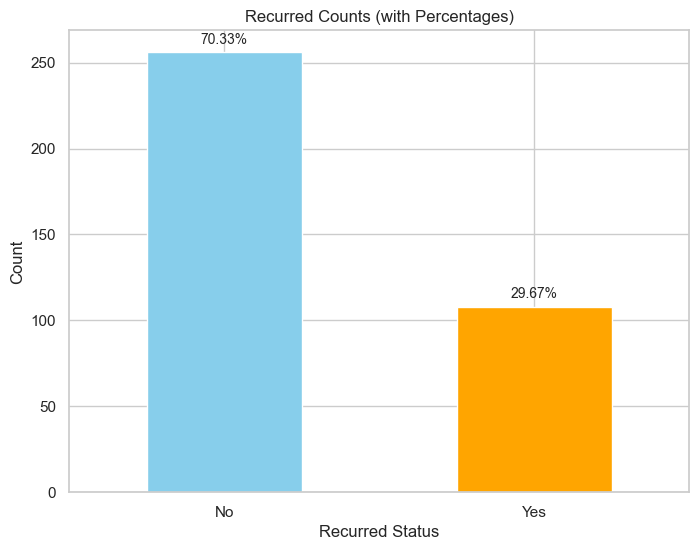

In [59]:
# Calculation of value counts and percentages of "Recurred class"
value_counts = df['Recurred'].value_counts()
percentages = (value_counts / len(df['Recurred'])) * 100

# Plot the bar chart
ax = value_counts.plot(
    kind='bar',
    color=['skyblue', 'orange'],
    figsize=(8, 6),
    title='Recurred Counts (with Percentages)',
    xlabel='Recurred Status',
    ylabel='Count',
    rot=0
)

# Annotate bars with percentages
for i, count in enumerate(value_counts):
    percentage = f"{percentages.iloc[i]:.2f}%"  # Format percentage
    ax.text(i, count + 5, percentage, ha='center', fontsize=10)  # Adjust the offset as needed

plt.show()

- The bar chart shows a larger number of 'Recuured No' compared to 'Recurred Yes', indicating an imbalance in diagnosis categories, which may affect model training.

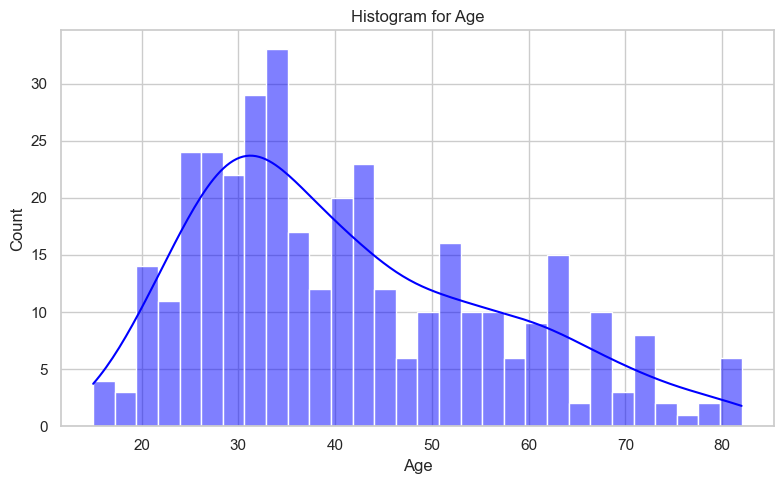

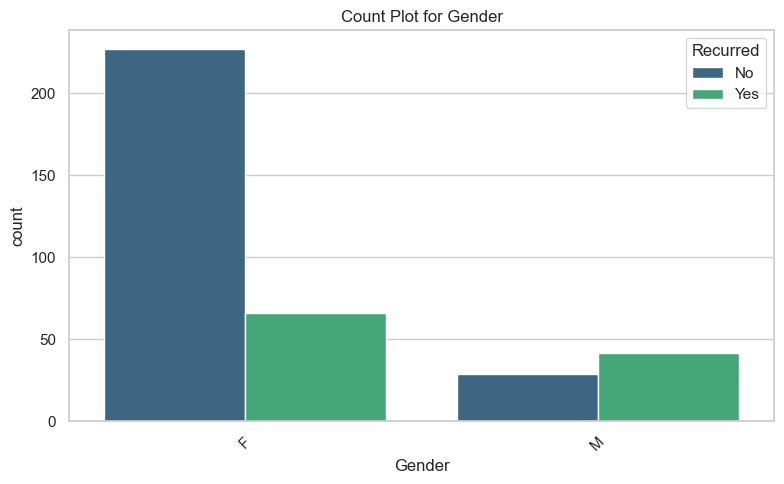

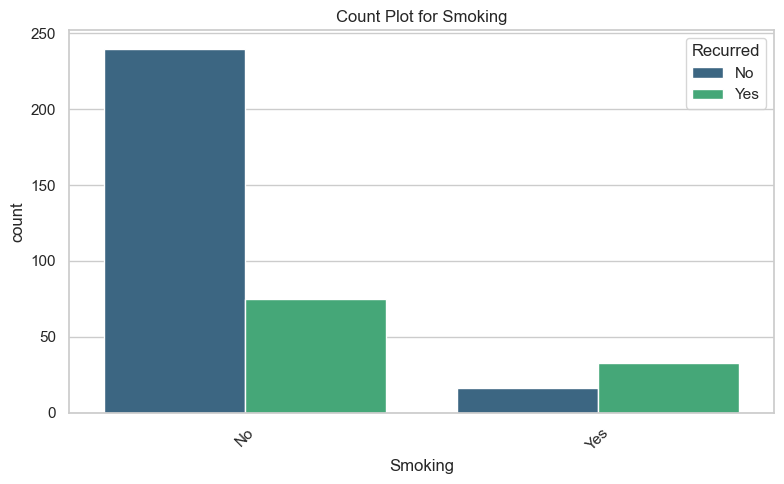

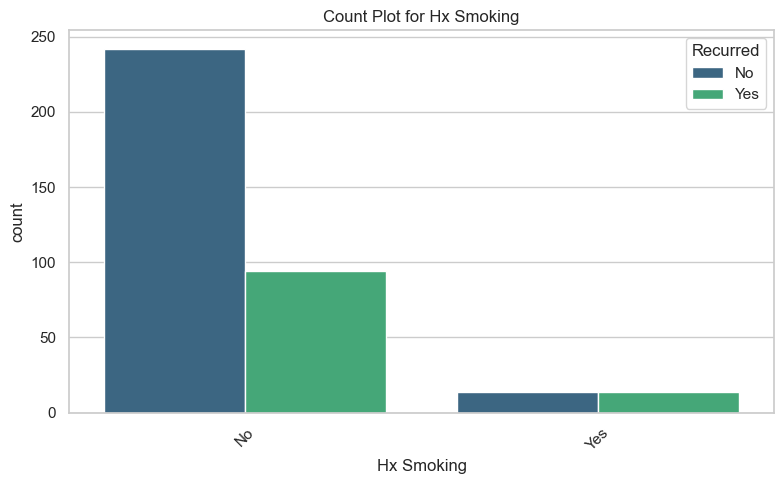

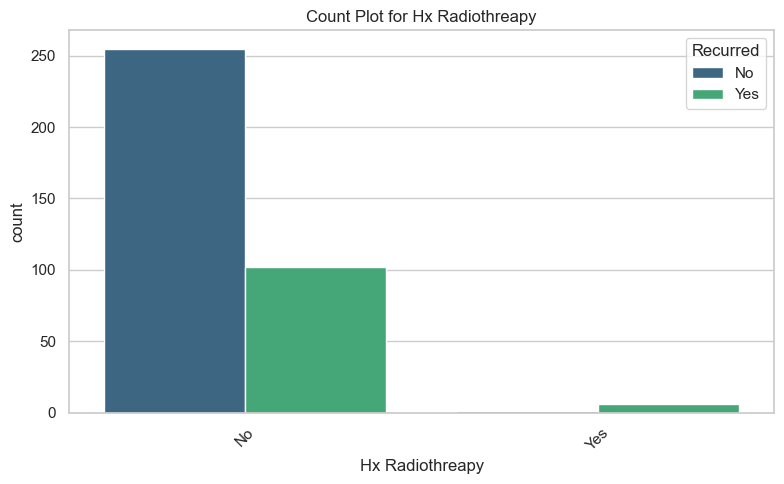

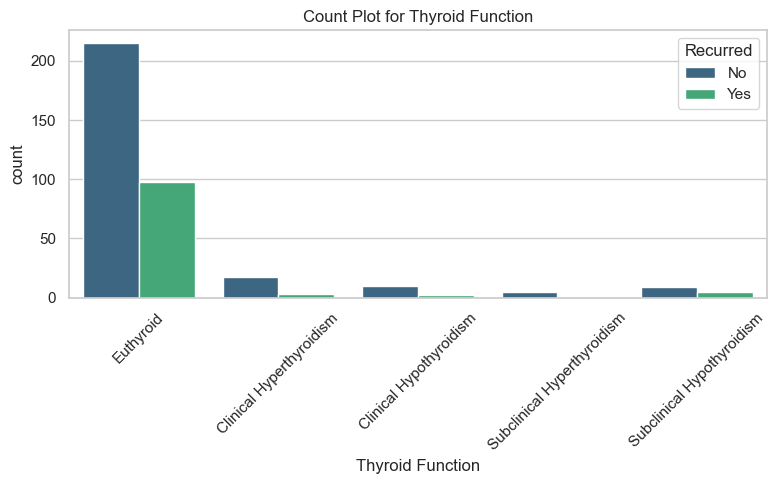

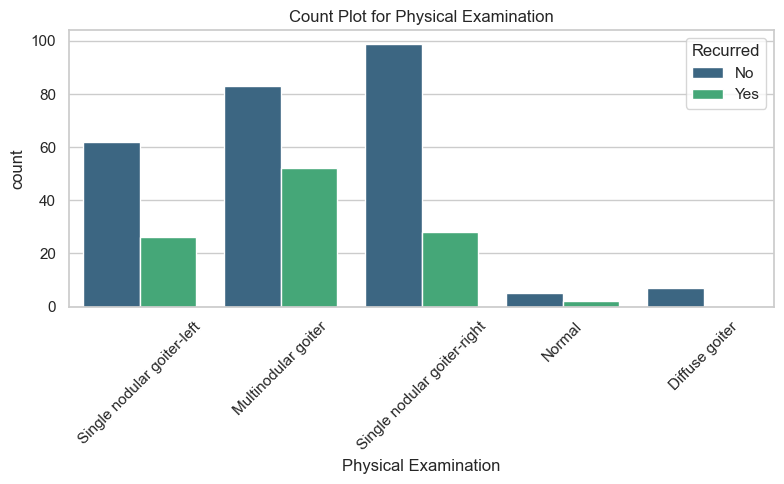

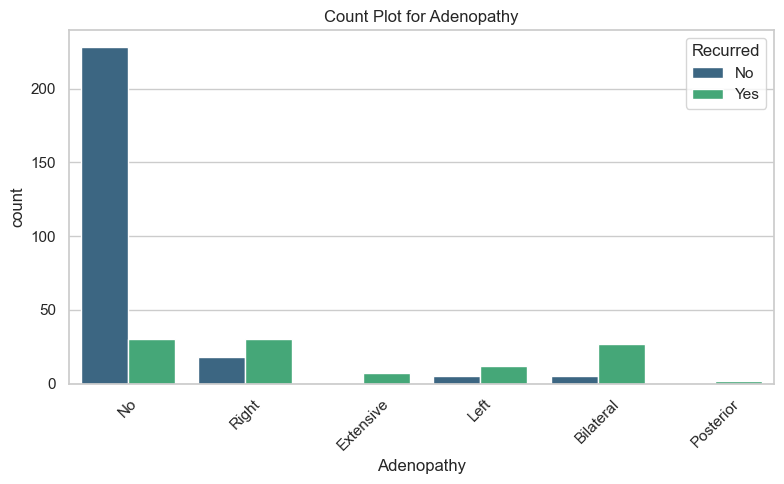

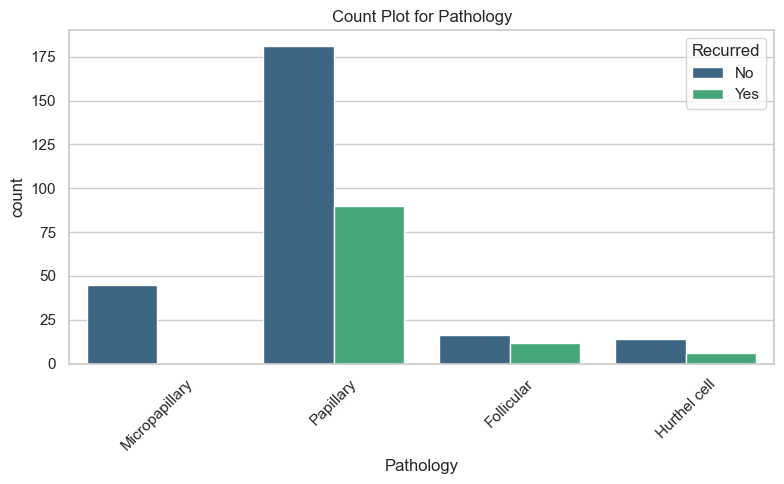

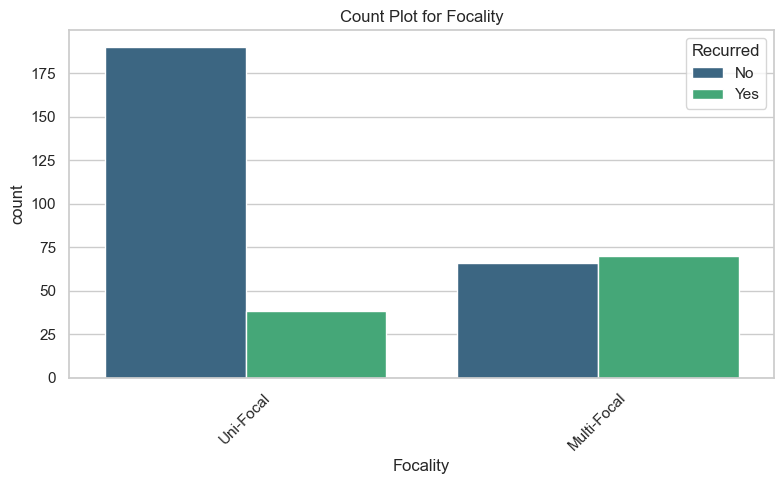

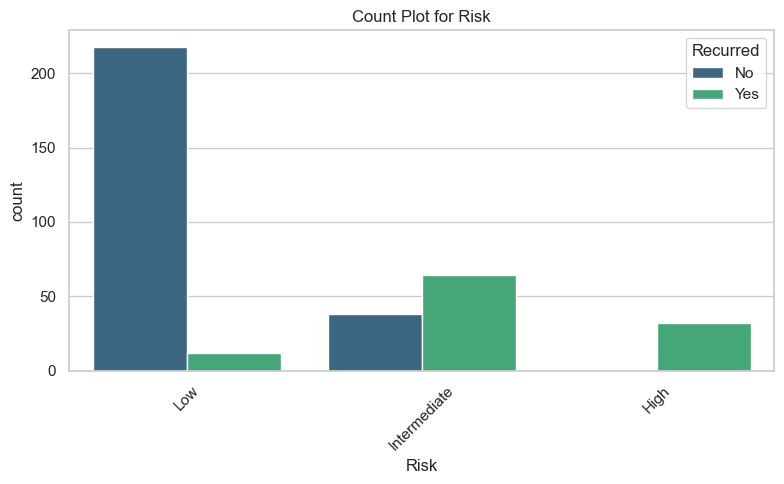

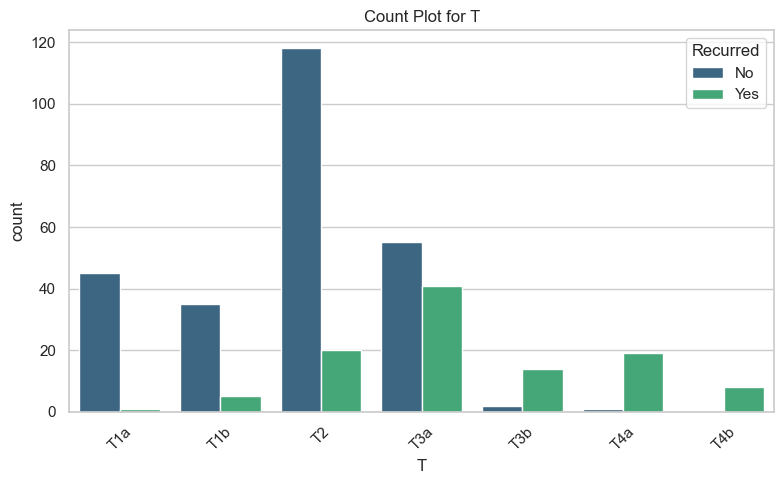

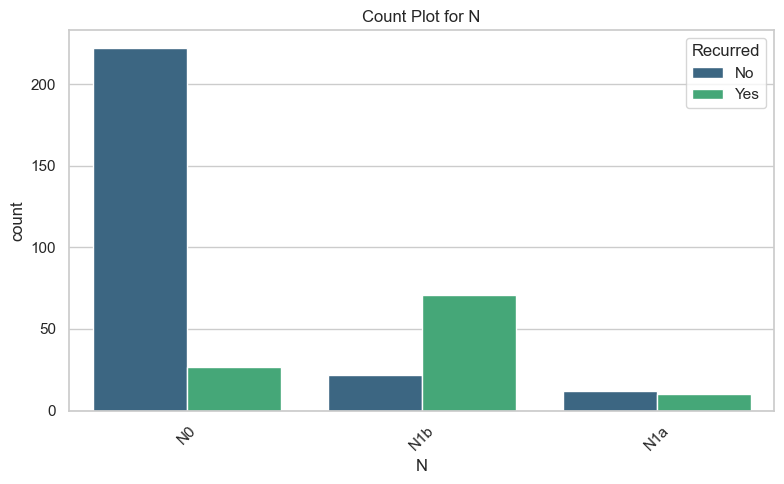

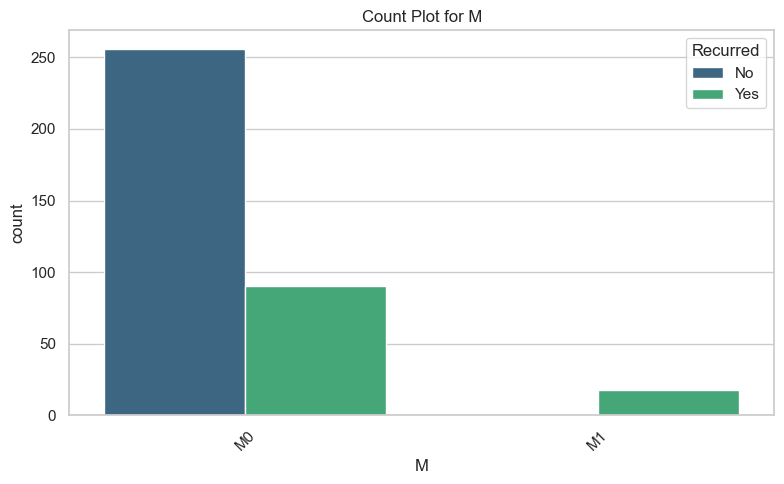

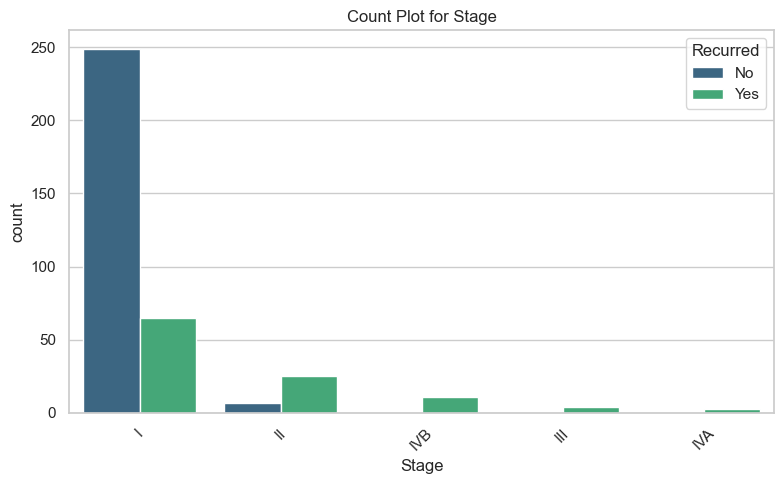

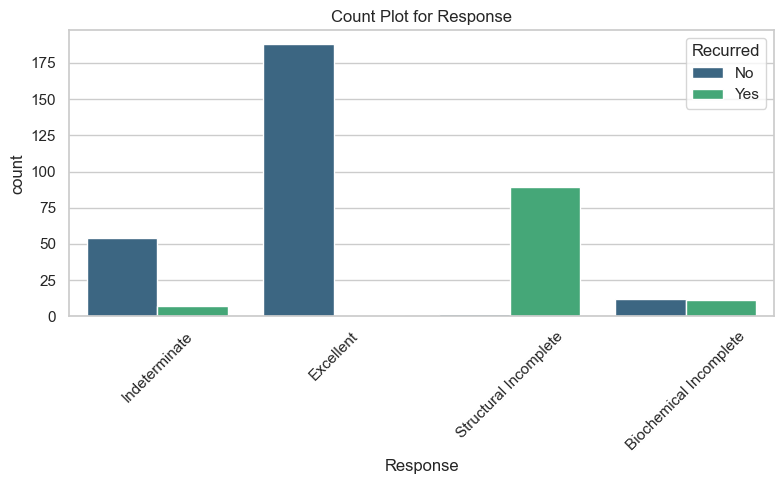

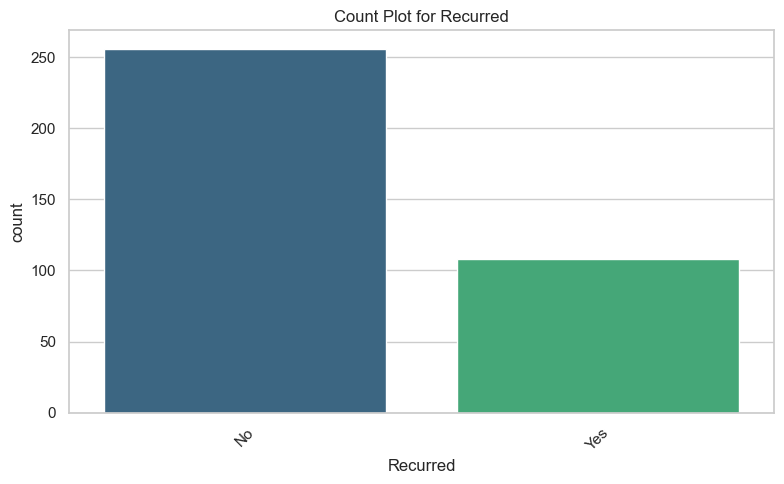

In [62]:
# Set the style for the plots
sns.set(style="whitegrid")
# Loop through all columns and create appropriate plots
for column in df.columns:
    plt.figure(figsize=(8, 5))
    # If the column is categorical, plot a bar plot
    if df[column].dtype == 'object':
        # Bar plot for categorical columns
        sns.countplot(x=df[column], palette='viridis',hue=df['Recurred'])
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=45)
    else:
        # Histogram for numerical columns
        sns.histplot(df[column],kde=True, color='blue', bins=30)
        plt.title(f'Histogram for {column}')

    plt.tight_layout()
    plt.show()

#### Age:
- Majority of patients fall within the middle-aged group.
- A small number of outliers were observed, representing younger or older patients with thyroid cancer.
#### Risk:
- Skewed distribution, indicating a higher concentration of patients in certain risk categories.
#### Gender:
- Fairly balanced, suggesting no major bias in gender distribution.
#### Smoking:
- Lower proportion of smokers, potentially influencing outcomes like recurrence.
#### Pathology:
- Distribution across various tumor types, with certain types appearing more frequently in recurrence cases.
#### Thyroid Function:
- **Euthyroid** is the most common thyroid function status among patients, both for recurrence and non-recurrence cases.
- Rare Thyroid Categories like Clinical Hyperthyroidism, Subclinical Hyperthyroidism, and others contribute minimally to the overall counts.
- Recurrence cases (green bars) are generally lower in all categories, reflecting the class imbalance observed in the target variable.

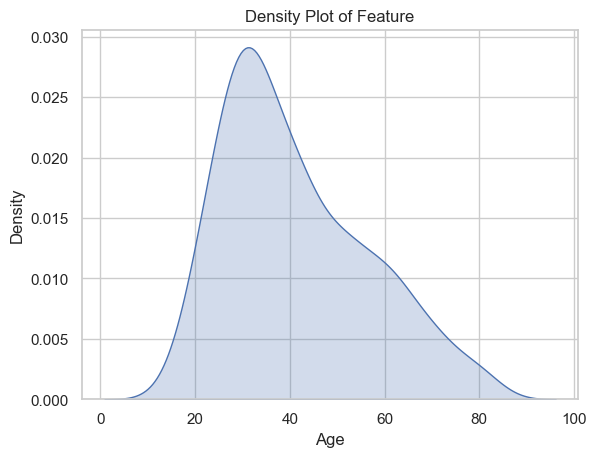

In [63]:
sns.kdeplot(df['Age'], fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Feature')
plt.show()

- The age feature has the slightly Positively Skeweed and Leptokurtic distribution.

## Preprocessing the Data with All Features

### Label Encoding

In [69]:
# Label encoding yes or no values

# Define mapping
mapping = {'No': 0, 'Yes': 1}

# TODO: Insert names of columns that have Yes or No values
boolean_columns = ['Smoking','Hx Smoking','Hx Radiothreapy','Recurred']
df[boolean_columns] = df[boolean_columns].map(mapping.get)

In [71]:
# Label encode features with only 2 values
le = LabelEncoder()

# TODO: Input column names that only have 2 values
columns_to_encode = ['Gender','Focality','M']

for column in columns_to_encode:
  df[column] = le.fit_transform(df[column])

### Label Encoding with Order

In [74]:
# Define mapping for 'Physical Examination'
mapping = {'Normal': 0, 'Diffuse goiter': 1, 'Single nodular goiter-left':2, 'Single nodular goiter-right':2, 'Multinodular goiter':3}

df['Physical Examination'] = df['Physical Examination'].map(mapping)

if np.isnan(df['Physical Examination'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

In [76]:
# Define mapping for 'Adenopathy'
mapping = {'No':0, 'Right':1, 'Left':1, 'Posterior':2, 'Bilateral':3, 'Extensive':4}

df['Adenopathy'] = df['Adenopathy'].map(mapping)

if np.isnan(df['Adenopathy'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')


In [78]:
# Define mapping for 'Pathology'
mapping = {'Micropapillary':0, 'Papillary':1, 'Follicular':2, 'Hurthel cell':3}

df['Pathology'] = df['Pathology'].map(mapping)

if np.isnan(df['Pathology'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

In [80]:
# Defining mapping for 'T'
mapping = {
    'T0': 0,        # No sign of cancer
    'T1a': 1,       # Cancer within thyroid, <= 1cm
    'T1b': 2,       # Cancer within thyroid, > 1cm and <= 2cm
    'T1': 3,        # General T1 if not further specified
    'T2': 4,        # Cancer within thyroid, > 2cm and <= 4cm
    'T3a': 5,       # Cancer within thyroid, > 4cm
    'T3b': 6,       # Cancer grown outside thyroid into nearby muscles (strap muscles)
    'T3': 7,        # General T3 if not further specified
    'T4a': 8,       # Cancer grown outside thyroid into nearby soft tissues (larynx, trachea, etc.)
    'T4b': 9        # Cancer grown outside thyroid into bones of spine or major blood vessels
}

df['T'] = df['T'].map(mapping)

if np.isnan(df['T'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

In [82]:
# Defining mapping for 'N'
mapping = {
    'N0': 0,     # No spread to lymph nodes
    'N1a': 1,    # Spread to lymph nodes close to the thyroid (pretracheal, paratracheal, prelaryngeal, or superior mediastinal)
    'N1b': 2     # Spread to other lymph nodes in the neck (cervical or retropharyngeal lymph nodes)
}

df['N'] = df['N'].map(mapping)

if np.isnan(df['N'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

In [84]:
# Defining mapping for 'Stage'
mapping = {
    'I': 1,      # Stage 1: Cancer inside the thyroid, <= 4cm, no spread to lymph nodes or other parts
    'II': 2,     # Stage 2: Cancer inside thyroid <= 4cm, with possible lymph node involvement, or > 4cm (T3)
    'III': 3,    # Stage 3: Cancer grown outside thyroid into nearby soft tissue (T4a), lymph node involvement possible
    'IVA': 4,    # Stage 4A: Cancer spread beyond thyroid into bones of spine or major blood vessels (T4b), no distant metastasis
    'IVB': 5     # Stage 4B: Distant metastasis (e.g., lungs) (M1)
}

df['Stage'] = df['Stage'].map(mapping)

if np.isnan(df['Stage'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')


In [86]:
# Defining mapping for 'Response'
mapping = {
    'Excellent': 0,              # No detectable disease after treatment
    'Indeterminate': 1,          # Unclear classification post-treatment
    'Biochemical Incomplete': 2, # Continued thyroid dysfunction post-treatment (e.g., elevated thyroglobulin)
    'Structural Incomplete': 3   # Persistent tumor size/growth or lymph node swelling post-treatment
}

df['Response'] = df['Response'].map(mapping)

if np.isnan(df['Response'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

In [88]:
# Defining mapping for 'Risk'
mapping = {
    'Low': 0,
    'Intermediate': 1,
    'High': 2
}

df['Risk'] = df['Risk'].map(mapping)

if np.isnan(df['Risk'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

In [90]:
# Initializing OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[['Thyroid Function']])

In [92]:
# Converting to DataFrame
encoded_df = pd.DataFrame(
    encoded_array, 
    columns=encoder.get_feature_names_out(['Thyroid Function'])
)
encoded_df

,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
359,0.0,0.0,1.0,0.0,0.0
360,0.0,0.0,1.0,0.0,0.0
361,0.0,0.0,1.0,0.0,0.0
362,1.0,0.0,0.0,0.0,0.0


In [94]:
# Concatenating the original dataframe (df) and the new one-hot encoded features (features)
# along the columns (axis=1). This results in a combined DataFrame with both the original
# and one-hot encoded features
pd.concat([df, encoded_df], axis=1)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,N,M,Stage,Response,Recurred,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism
0,27.0,0.0,0.0,0.0,0.0,Euthyroid,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34.0,0.0,0.0,1.0,0.0,Euthyroid,3.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,30.0,0.0,0.0,0.0,0.0,Euthyroid,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,62.0,0.0,0.0,0.0,0.0,Euthyroid,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,62.0,0.0,0.0,0.0,0.0,Euthyroid,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0


In [96]:
df=df.dropna()

In [100]:
# Drop the original 'Thyroid Function' column from the dataframe
# as it has been replaced by the one-hot encoded columns.
df = df.drop(['Thyroid Function'], axis='columns')

# Display the first few rows of the updated dataframe to inspect the result.
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,0,0,1,0,1,0,0,1,1,0
1,34,0,0,1,0,3,0,0,1,0,1,0,0,1,0,0
2,30,0,0,0,0,2,0,0,1,0,1,0,0,1,0,0
3,62,0,0,0,0,2,0,0,1,0,1,0,0,1,0,0
4,62,0,0,0,0,3,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,1,1,1,2,9,2,1,5,2,1
379,81,1,1,0,1,3,4,1,0,2,9,2,1,5,3,1
380,72,1,1,1,0,3,3,1,0,2,9,2,1,5,3,1
381,61,1,1,1,1,3,4,3,0,2,9,2,0,4,3,1


### Split to Train and Test

In [103]:
# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split   # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
from sklearn.metrics import roc_curve, roc_auc_score  # For calculating ROC curve and AUC

In [105]:
# Drop the 'Recurred' column from the DataFrame to create the input features DataFrame
inputs = df.drop('Recurred', axis='columns')

# Select the target column 'Recurred' from the DataFrame to create the target DataFrame
target = df['Recurred']

In [107]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (291, 15)
X_test shape: (73, 15)
y_train shape: (291,)
y_test shape: (73,)


## Scaling the Data for the Models

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Logistic Regression with fixes
lr_model = LogisticRegression(random_state=42, max_iter=1000000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluating the model
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Cross-Validation Score:", np.mean(cross_val_score(lr_model, inputs, target, scoring='accuracy', cv=10)))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.81      0.95      0.88        22

    accuracy                           0.92        73
   macro avg       0.89      0.93      0.91        73
weighted avg       0.93      0.92      0.92        73

Accuracy Score: 0.9178082191780822
Cross-Validation Score: 0.9036036036036036


## Random Forest Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initializing and training the model
rf_model = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Cross-Validation Score:", np.mean(cross_val_score(rf_model, inputs, target, scoring='accuracy', cv=10)))
print("OOB Score:", rf_model.oob_score_)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73

Accuracy Score: 0.958904109589041
Cross-Validation Score: 0.9144144144144144
OOB Score: 0.9725085910652921


## Gradient Boosting Classifier

In [161]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialization and training of the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

#  predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("Cross-Validation Score:", np.mean(cross_val_score(gb_model, inputs, target, scoring='accuracy', cv=10)))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.83      0.91      0.87        22

    accuracy                           0.92        73
   macro avg       0.90      0.92      0.90        73
weighted avg       0.92      0.92      0.92        73

Accuracy Score: 0.9178082191780822
Cross-Validation Score: 0.9255255255255255


## XG Boost

In [163]:
import xgboost as xgb

# Initialization and training of XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluations
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("Cross-Validation Score:", np.mean(cross_val_score(xgb_model, inputs, target, scoring='accuracy', cv=10)))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.87      0.91      0.89        22

    accuracy                           0.93        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.93      0.93      0.93        73

Accuracy Score: 0.9315068493150684
Cross-Validation Score: 0.9087837837837839


## Multi Layer Perceptron

In [128]:
from sklearn.neural_network import MLPClassifier

# Initialization and training the MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=800, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluation
print("MLPClassifier Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Accuracy Score:", accuracy_score(y_test, y_pred_mlp))


MLPClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.81      0.95      0.88        22

    accuracy                           0.92        73
   macro avg       0.89      0.93      0.91        73
weighted avg       0.93      0.92      0.92        73

Accuracy Score: 0.9178082191780822


## Deep Neural Network

In [131]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialization of DNN model
dnn_model = Sequential()
dnn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compiling model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training  model
dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Making predictions
y_pred_dnn = (dnn_model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluating the model
print("DNN Classification Report:\n", classification_report(y_test, y_pred_dnn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dnn))


C:\Users\farma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6857 - loss: 0.6666 - val_accuracy: 0.7966 - val_loss: 0.5989
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7888 - loss: 0.5940 - val_accuracy: 0.8814 - val_loss: 0.5334
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8743 - loss: 0.5341 - val_accuracy: 0.8983 - val_loss: 0.4753
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8778 - loss: 0.4842 - val_accuracy: 0.9153 - val_loss: 0.4211
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8892 - loss: 0.4423 - val_accuracy: 0.9322 - val_loss: 0.3641
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8850 - loss: 0.3839 - val_accuracy: 0.9322 - val_loss: 0.3088
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9109 - loss: 0.3386 - val_accuracy: 0.9153 - val_loss: 0.2620
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9188 - loss: 0.2969 - val_accuracy: 0.9153 - val_loss: 0.2269


## Hyperparameter Tuning

#### 1) For Random Forest

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initializing GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=2
)

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluating the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9724722384570427
Test Set Accuracy: 0.958904109589041


In [138]:
# Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [142]:
# Best Estimator
best_rf_model = grid_search.best_estimator_
best_rf_model

RandomForestClassifier(n_estimators=50, random_state=42)

In [165]:
# Training the model with Best Hyperparameters from GridSearchCV
best_rf_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluating the model's performance
print("Best MLP Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_rf))
print("Cross-Validation Score:", np.mean(cross_val_score(best_rf_model, inputs, target, scoring='accuracy', cv=10)))

Best MLP Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73

Accuracy Score: 0.958904109589041
Cross-Validation Score: 0.9144144144144144


#### 2) For Gradient Boosting Classifier

In [154]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fitting the model
random_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Use the best model to make predictions
best_random_gb_model = random_search.best_estimator_
y_pred_random_gb = best_random_gb_model.predict(X_test_scaled)

# Evaluating the tuned model
print("Tuned Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_random_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_random_gb))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.1}
Best Cross-Validation Score: 0.9724722384570427
Tuned Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73

Accuracy Score: 0.958904109589041


In [157]:
# Best Hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.1}


In [178]:
# Training the model with Best Hyperparameters from RandomisedSearchCV
best_random_gb_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_best_gb = best_random_gb_model.predict(X_test_scaled)

# Evaluating the model's performance
print("Best MLP Classification Report:\n", classification_report(y_test, y_pred_best_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_gb))
print("Cross-Validation Score:", np.mean(cross_val_score(best_random_gb_model, inputs, target, scoring='accuracy', cv=10)))

Best MLP Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73

Accuracy Score: 0.958904109589041
Cross-Validation Score: 0.9255255255255255


#### 3) For XG Boost

In [172]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fitting the model
random_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Using the best model to make predictions
best_random_xgb_model = random_search.best_estimator_
y_pred_random_xgb = best_random_xgb_model.predict(X_test_scaled)

# Evaluate the tuned model
print("Tuned XGBoost Classification Report:\n", classification_report(y_test, y_pred_random_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_random_xgb))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Cross-Validation Score: 0.9724722384570427
Tuned XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.90      0.86      0.88        22

    accuracy                           0.93        73
   macro avg       0.92      0.91      0.92        73
weighted avg       0.93      0.93      0.93        73

Accuracy Score: 0.9315068493150684


In [174]:
# Best Hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}


In [180]:
# Training the model with Best Hyperparameters from RandomisedSearchCV
best_random_xgb_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_best_xgb = best_random_xgb_model.predict(X_test_scaled)

# Evaluating the model's performance
print("Best MLP Classification Report:\n", classification_report(y_test, y_pred_best_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_xgb))
print("Cross-Validation Score:", np.mean(cross_val_score(best_random_xgb_model, inputs, target, scoring='accuracy', cv=10)))

Best MLP Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.90      0.86      0.88        22

    accuracy                           0.93        73
   macro avg       0.92      0.91      0.92        73
weighted avg       0.93      0.93      0.93        73

Accuracy Score: 0.9315068493150684
Cross-Validation Score: 0.9089339339339337


#### 3) For Deep Neural Network

In [187]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [189]:
# Defining the model as a function
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(128, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [191]:
# Wrap the model with SciKerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

In [193]:
# Define the parameter grid
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],     # Optimizer options
    'model__activation': ['relu', 'tanh'],      # Activation function options
    'batch_size': [32, 64],                  # Batch size options
    'epochs': [50, 100],                        # Epoch options
    'model__dropout_rate': [0.0, 0.2, 0.4]      # Dropout rate options
}


In [195]:
# Initializing GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fitting the GridSearchCV
grid_result = grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Cross-Validation Score:", grid_result.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\farma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 64, 'epochs': 100, 'model__activation': 'relu', 'model__dropout_rate': 0.4, 'model__optimizer': 'adam'}
Best Cross-Validation Score: 0.9725085910652921


In [199]:
# Evaluating the best model on the test set
best_dnn_model = grid_result.best_estimator_
y_pred_dnn = (best_dnn_model.predict(X_test_scaled) > 0.5).astype("int32")

In [201]:
from sklearn.metrics import classification_report, accuracy_score
print("Tuned DNN Classification Report:\n", classification_report(y_test, y_pred_dnn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dnn))

Tuned DNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.91      0.91      0.91        22

    accuracy                           0.95        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.95      0.95      0.95        73

Accuracy Score: 0.9452054794520548


## Feature importance

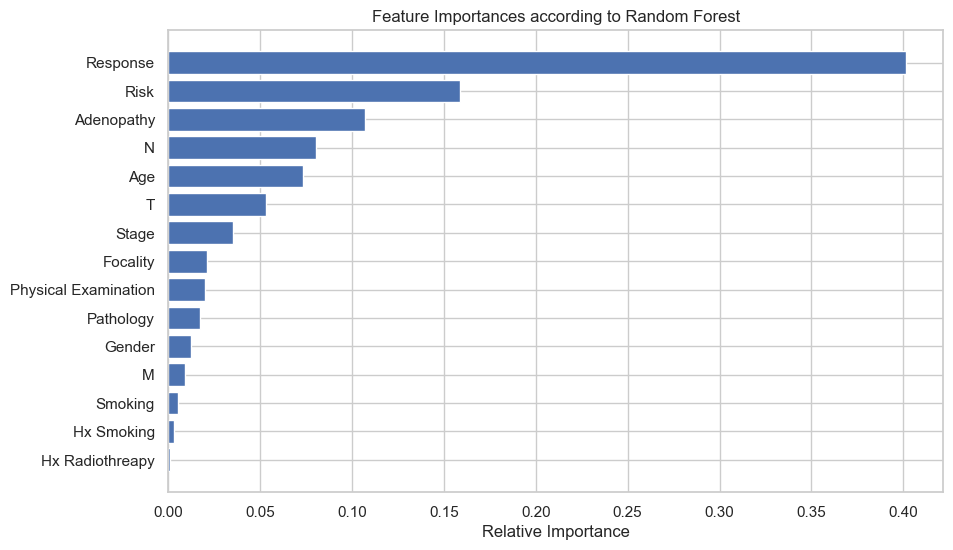

In [204]:
# Feature importance according to Random Forest
feature_names = list(df.columns)
feature_names.remove('Recurred')
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances according to Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

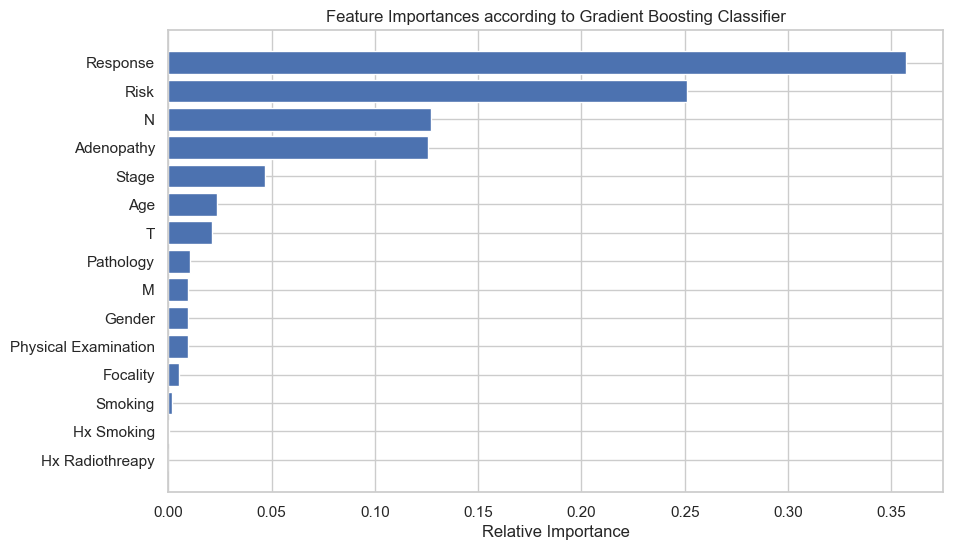

In [206]:
# Feature importance according to Gradient Boosting Classifier
feature_names = list(df.columns)
feature_names.remove('Recurred')
importances =best_random_gb_model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances according to Gradient Boosting Classifier')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

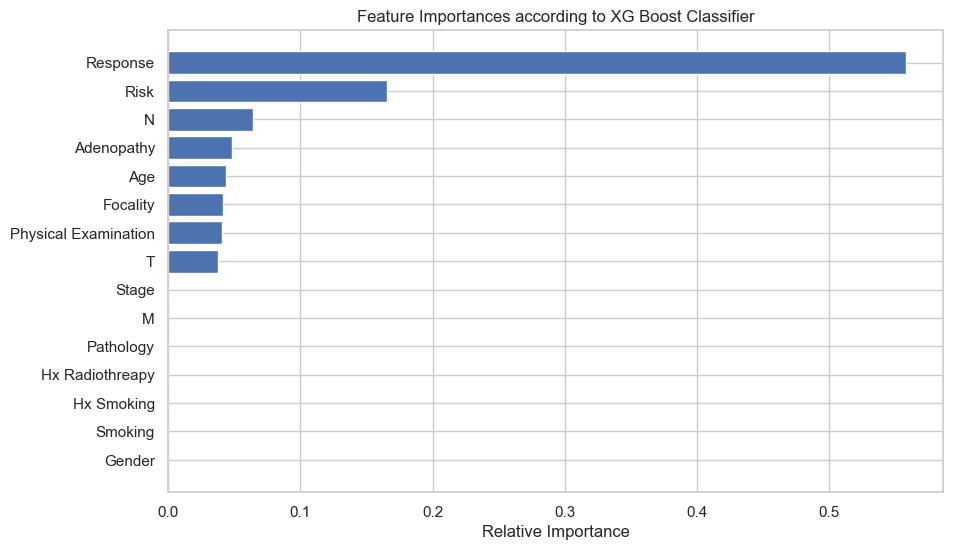

In [208]:
# Feature importance according to XG Boost Classifier
feature_names = list(df.columns)
feature_names.remove('Recurred')
importances = best_random_xgb_model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances according to XG Boost Classifier')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [212]:
from sklearn.inspection import permutation_importance

In [214]:
# Using the best model from GridSearchCV
best_dnn_model = grid_result.best_estimator_

# Computing permutation importance
result = permutation_importance(best_dnn_model, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Extracting importance values
importances = result.importances_mean
indices = np.argsort(importances)


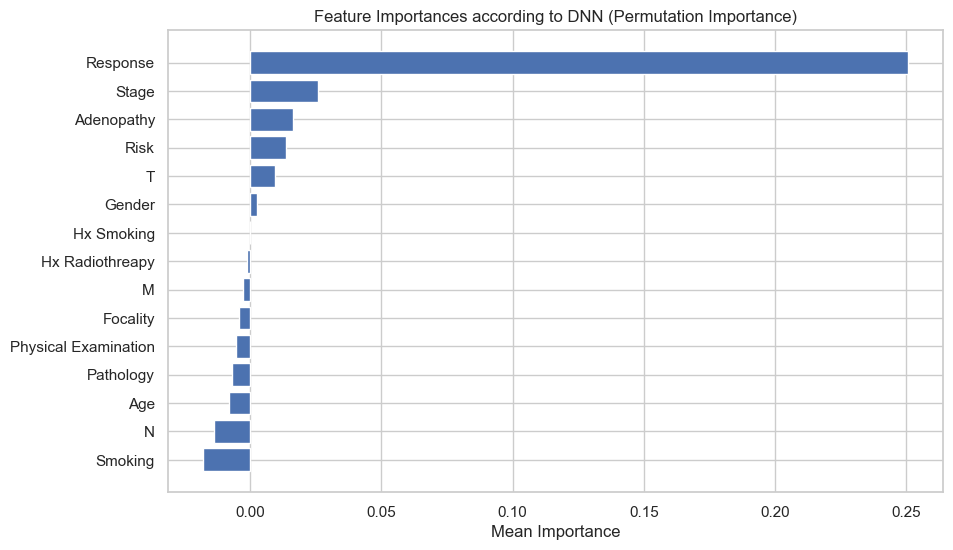

In [216]:
# Plotting feature importance
feature_names = list(df.columns)
feature_names.remove('Recurred')  # Excluding target column

plt.figure(figsize=(10, 6))
plt.title('Feature Importances according to DNN (Permutation Importance)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Mean Importance')
plt.show()

The image is showing a horizontal bar chart, representing the permutation importance of various features according to a Deep Neural Network (DNN) model. Here's a breakdown of the key points:
**Title** **"Feature Importances according to DNN (Permutation Importance)"** indicates the relative impact of each feature on the model's accuracy using the permutation importance method.
**Y-Axis (Features)** - These are sorted in ascending order of importance, with the most important features at the top.
**X-Axis (Importance Scores)** - Higher values indicate greater importance, i.e., features that significantly impact the model's predictive power.

## Insights
- Focusing on features like **Response**, **Stage**, and **Adenopathy** might provide the most predictive value in your dataset.
- Low-importance features (e.g., **Hx Radiotherapy**, **Physical Examination**) could potentially be dropped for a more streamlined model, depending on our use case and dataset specifics.

## Ploting the Learning Curve

In [224]:
# To generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
   best_dnn_model, X_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='accuracy')

In [226]:
# To calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

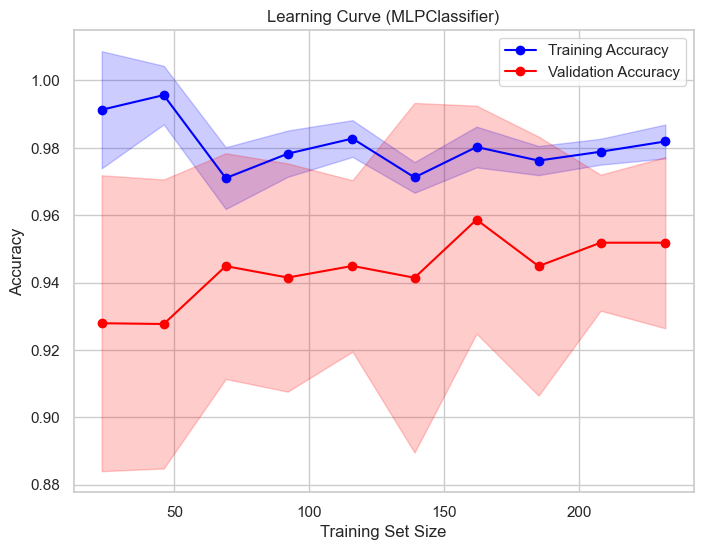

In [228]:
# Plotting the learning curve
plt.figure(figsize=(8, 6))

# Plot training and validation accuracy curves
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='red', marker='o')

# Plot the fill between to represent the variance (standard deviation)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

plt.title('Learning Curve (MLPClassifier)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

It sounds like the model has reached a good balance between training performance and generalization, which is exactly what a well-optimized learning curve should indicate. When a model’s learning curves (training and validation) converge closely, with little gap and high accuracy, it typically suggests: -Balanced Bias and Variance, Effective Generalization and Early Stopping or Further Training Not Necessary.

# Model Deployment

#### Saving Machine Learning Models
The performence of **Tuned Random Forest Classifier** with Accuracy Score: 0.95, **Tuned Gradient Boosting Classifier** with Accuracy Score: 0.95, **Tuned XGBoost model**with Accuracy Score: 0.93 and **Tuned DNN**with Accuracy Score: 0.94 are well with balanced precision and recall across both classes, which is crucial in medical diagnosis to avoid both false positives and false negatives.

In [233]:
import joblib

# Saving the trained model
joblib.dump(best_rf_model, 'Random_forest_model.pkl')
joblib.dump(best_random_gb_model,'GradientBoostingClassifier.pkl')
joblib.dump(best_random_xgb_model,'XG_Boost_model.pkl')
joblib.dump(best_dnn_model,'DNN_model.pkl')

['DNN_model.pkl']